In [1]:
# import the relevant libraries
import requests
import json

import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt
import seaborn as sns

# Reading the data

### Properties CSV file

In [2]:
# Import the csv file using pandas read_csv() method
properties_raw_data = pd.read_csv('properties.csv', index_col = 0)

In [3]:
# View the data types from the imported CSV file
properties_raw_data.dtypes

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

### Customers CSV file

In [4]:
# Import the csv file using pandas read_csv() method
customers_raw_data = pd.read_csv('customers.csv', index_col = 0)

In [5]:
# View the data types from the imported CSV file
customers_raw_data.dtypes

﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

# Data Cleaning and Pre-processing

### Properties

In [6]:
# Create a new variable that replicates the original data set, leaving the original import un processed for later reference

properties = properties_raw_data.copy()

In [7]:
# Use properties.describe() to present a statistical summary of the data to gather information on the data types available

properties.describe(include='all')

,﻿id,building,date_sale,type,property#,area,price,status,customerid
count,267.000000,267.000000,267,267,267.000000,267.000000,267,267,195
unique,NaN,NaN,44,2,NaN,NaN,266,2,162
top,NaN,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,NaN,NaN,72,259,NaN,NaN,2,195,9
mean,2975.142322,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,1392.197474,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,1002.000000,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,2015.500000,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,3024.000000,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,4031.500000,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


In [8]:
# the 'id' column appears to contain numeric values, this is confirmed in the data types values for the df
# the id's will be an identifier, the absence of unique, top and freq values suggest that they are all individual int values

properties.dtypes

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [9]:
# the id values should not be integers, I want to avoid any kind of numerical operations being performed on them
# the following code returns an error when casting the integer values as strings. The 'id' column is not recognised

# properties['id'] = properties['id'].astype(str)

In [10]:
# View the column values to understand why 'id' is not being recognised

properties.columns.array

# During data collection, we've unintentionally fetched the byte order mark (or BOM) along with the actual data for the 'id' column
# Note here visually I can see that the other column names do not have this error in them

<PandasArray>
[  '\ufeffid',   'building',  'date_sale',       'type',  'property#',
       'area',      'price',     'status', 'customerid']
Length: 9, dtype: object

In [11]:
# Rename the colume using the 'rename' function

properties = properties.rename(columns={'\ufeffid':'id'})

# Preview the data set to confirm changes
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [12]:
# No error message now when the column name is used

properties['id']

0      1030
1      1029
2      2002
3      2031
4      1049
       ... 
262    5044
263    5047
264    5048
265    5050
266    5051
Name: id, Length: 267, dtype: int64

In [13]:
# Convert id from an integer to a string. This is a more suitable data format for the id value as it is an identifier

properties['id'] = properties['id'].astype(str)

properties['id']

0      1030
1      1029
2      2002
3      2031
4      1049
       ... 
262    5044
263    5047
264    5048
265    5050
266    5051
Name: id, Length: 267, dtype: object

In [14]:
# The building and property# variables are also integers that do not require any numeric operations performed on them
# Convert building and property# from integer to a string

properties['building'] = properties['building'].astype(str)
properties['property#'] = properties['property#'].astype(str)

# Check new data types

properties.dtypes

id             object
building       object
date_sale      object
type           object
property#      object
area          float64
price          object
status         object
customerid     object
dtype: object

In [15]:
properties.describe(include='all')

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,267,267,267,267.000000,267,267,195
unique,240,5,44,2,59,NaN,266,2,162
top,5041,3,#NUM!,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,72,259,7,NaN,2,195,9
mean,NaN,NaN,NaN,NaN,NaN,936.221311,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,284.894858,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1121.950000,NaN,NaN,NaN


In [16]:
# The data type of 'date_sale' is an object, only 44 unique values which for dates is odd -> review to see if this needs to 
# be processed into a different data type

properties['date_sale'].unique()


# COMMENTS
# 1. '#NUM!' can be replaced with <NA> in pandas
# 2. Only the first of each month is listed - this explains why there are only 44 unique values. The data doesn't have details 
#    on specific dates only the month
# 3. Currently classified as an object type -> dates are treated as strings and not dates

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

In [17]:
# Replace the '#NUM!' value with one that pandas will recognise as a null value

properties['date_sale'] = np.where(properties['date_sale']=='#NUM!', pd.NA, properties['date_sale'])

properties['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', <NA>, '9/1/2005', '7/1/2005'], dtype=object)

In [18]:
# Convert 'date_sale' to datetime data format

properties['date_sale'] = pd.to_datetime(properties['date_sale'])
properties['date_sale']

0     2005-11-01
1     2005-10-01
2     2007-07-01
3     2007-12-01
4     2004-11-01
         ...    
262          NaT
263          NaT
264          NaT
265          NaT
266          NaT
Name: date_sale, Length: 267, dtype: datetime64[ns]

In [19]:
properties.describe(include='all', datetime_is_numeric=True)

,id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,195,267,267,267.000000,267,267,195
unique,240,5,NaN,2,59,NaN,266,2,162
top,5041,3,NaN,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,NaN,259,7,NaN,2,195,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,NaN,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,NaN,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,NaN,NaN,NaN


In [20]:
properties['type'].unique()

array(['Apartment', 'Office'], dtype=object)

In [21]:
# Standardise the 'type' column by converting all letters to lowercase

properties['type'] = properties['type'].str.lower()

In [22]:
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014


In [23]:
properties.dtypes

# 'price' is an object, probably due to $ sign. It should be converted to a float

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
price                 object
status                object
customerid            object
dtype: object

In [24]:
# Strip the dollar symbol and create a new Series to store the values

properties['price$'] = properties['price'].str.strip('$')
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,"246,172.68"
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,"246,331.90"
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,"209,280.91"
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,"452,667.01"
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,"467,083.31"


In [25]:
# Remove the ',' from the price strings before converting to a float

properties['price$'] = properties['price$'].replace(',','',regex=True)
properties.head()

,id,building,date_sale,type,property#,area,price,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,"$246,172.68",Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,"$246,331.90",Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,"$209,280.91",Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,"$452,667.01",Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,"$467,083.31",Sold,C0014,467083.31


In [26]:
properties['price$'] = properties['price$'].astype(float)

In [27]:
# Drop the original price column from the data set

properties = properties.drop(['price'], axis=1)
properties.head()

,id,building,date_sale,type,property#,area,status,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,Sold,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,Sold,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,Sold,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,Sold,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,Sold,C0014,467083.31


In [28]:
# Check data types

properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
status                object
customerid            object
price$               float64
dtype: object

In [29]:
# Review the status column

properties['status'].unique()

# 2 distinct values indicating the status as either 'Sold' or '-'. No missing values in this column. Sold needs to be standardised

array([' Sold ', '-'], dtype=object)

In [30]:
# Remove blank spaces and convert characters to lower case

properties['status'] = properties['status'].str.strip()
properties['status'] = properties['status'].str.lower()

# Examine the results

properties['status'].unique()

array(['sold', '-'], dtype=object)

In [31]:
# The two values in the 'status' column represent sold and unsold. These can be updated to be boolean values of 0 and 1
# First update the name of the column

properties = properties.rename(columns= {'status': 'sold'})

In [32]:
# Use .map() to convert 'sold' and '-' to 1 and 0 respectively

properties['sold'] = properties['sold'].map({'sold':1,'-':0})

properties['sold'].unique()

# Values have been succesfully transformed

array([1, 0], dtype=int64)

In [33]:
properties.dtypes

id                    object
building              object
date_sale     datetime64[ns]
type                  object
property#             object
area                 float64
sold                   int64
customerid            object
price$               float64
dtype: object

In [34]:
# Check for any remaining missing values in the data set

properties.isna().sum()

id             0
building       0
date_sale     72
type           0
property#      0
area           0
sold           0
customerid    72
price$         0
dtype: int64

In [35]:
# Review the now cleaned data set

properties

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31
...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78


## Customers

In [36]:
# Create a new variable that replicates the original data set, leaving the original import un processed for later reference

customers = customers_raw_data.copy()

In [37]:
# Visually look at the different data in each column

customers.describe(include='all')

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [38]:
# Check the data types of the variables

customers.dtypes

﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [39]:
# Check that the column titles are correct

customers.columns.array

<PandasArray>
[ '\ufeffcustomerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [40]:
# Rename customerid due to JSON format being imported into Pandas data frame

customers = customers.rename(columns = {'\ufeffcustomerid':'customerid'})

In [41]:
customers.head()

,customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [42]:
# Check for missing values

customers.isna().sum()

# No missing values and the data types being an object indicate missing value could be stored as strings

customerid           0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [43]:
customers = customers.rename(columns= {'entity':'individual'})
customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [44]:
# Observe unique values in 'individual'

customers['individual'].unique()

array(['Individual', 'Company'], dtype=object)

In [45]:
# Map Individual and Company to 1 and 0 to make boolean like variable

customers['individual'] = customers['individual'].map({'Individual':1, 'Company':0})

In [46]:
# Observe unique values in 'sex'

customers['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [47]:
# Map F and M to 1 and 0 respectively to make boolean like variable. Set empty strings as <NA> pandas recognised format

customers['sex'] = customers['sex'].map({'F':'1', 'M':'0', '':pd.NA})

In [48]:
customers.isna().sum()

customerid           0
individual           0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [49]:
# Convert state and purpose values to lower case for standardisation 

customers['state'] = customers['state'].str.lower()
customers['source'] = customers['source'].str.lower()

customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,california,Home,4,Yes,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,california,Home,1,No,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,california,Home,4,Yes,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,california,Home,5,No,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,california,Investment,5,No,website


In [50]:
# Map Yes and No to 1 and 0 respectively for 'mortage' to make boolean like variables

customers['mortgage'] = customers['mortgage'].map({'Yes':1, 'No':0})

customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,california,Home,4,1,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,california,Home,1,0,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,california,Home,4,1,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,california,Home,5,0,website
4,C0174,0,Marleez,Co,NaN,NaN,USA,california,Investment,5,0,website


In [51]:
# Check for missing values

customers.isna().sum()

customerid           0
individual           0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [52]:
# Create a new column that combines the 'name' and 'surname' columns 

customers['full_name'] = customers['name'] + ' ' + customers['surname']

customers.head()

,customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,california,Home,4,1,website,Kareem Liu
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,california,Home,1,0,website,Trystan Oconnor
2,C0132,1,Kale,Gay,4/7/1959,0,USA,california,Home,4,1,agency,Kale Gay
3,C0137,1,Russell,Gross,11/25/1959,0,USA,california,Home,5,0,website,Russell Gross
4,C0174,0,Marleez,Co,NaN,NaN,USA,california,Investment,5,0,website,Marleez Co


In [53]:
# Drop the 'name' and 'surname' columns from the dataframe

customers = customers.drop(['name', 'surname'], axis = 1)

customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,5/11/1968,1,USA,california,Home,4,1,website,Kareem Liu
1,C0010,1,11/26/1962,0,USA,california,Home,1,0,website,Trystan Oconnor
2,C0132,1,4/7/1959,0,USA,california,Home,4,1,agency,Kale Gay
3,C0137,1,11/25/1959,0,USA,california,Home,5,0,website,Russell Gross
4,C0174,0,NaN,NaN,USA,california,Investment,5,0,website,Marleez Co


In [54]:
# Convert 'birth_date' to a datetime format

customers['birth_date'] = pd.to_datetime(customers['birth_date'])

customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,california,Home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,california,Home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,california,Home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,california,Home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,california,Investment,5,0,website,Marleez Co


In [55]:
# Check the data types of the columns to confirm changes

customers.dtypes

customerid                   object
individual                    int64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction             int64
mortgage                      int64
source                       object
full_name                    object
dtype: object

In [56]:
customers.isna().sum()

customerid           0
individual           0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
full_name            0
dtype: int64

In [57]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,california,Home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,california,Home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,california,Home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,california,Home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,california,Investment,5,0,website,Marleez Co


## Combine the two tables

In [58]:
properties.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31


In [59]:
customers.head()

,customerid,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,california,Home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,california,Home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,california,Home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,california,Home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,california,Investment,5,0,website,Marleez Co


In [60]:
# Use merge function in Pandas to combine the two dataframes. Customers will be left joined to properties data frame

pd.merge(properties, customers, on='customerid', how='left')

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# Left join did not work correctly, review the customerid data to see if there is an issue with the join variable

properties.customerid.unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [62]:
# Lots of blank spaces in customerid values, these can be cleaned

customers.customerid.unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

In [63]:
# Remove white space from customerid in both properties and customer customerid columns

properties['customerid'] = properties['customerid'].str.strip()

customers['customerid'] = customers['customerid'].str.strip()

In [64]:
# Check the total number of values in the customerid column of customers

customers.count()

customerid           162
individual           162
birth_date           155
sex                  155
country              162
state                154
purpose              162
deal_satisfaction    162
mortgage             162
source               162
full_name            162
dtype: int64

In [65]:
# Look at total unique values in customerid in properties. It matches with the total number of customerid in customers

properties['customerid'].nunique()

162

In [66]:
# Replacing the blank space nan value with pd.NA

properties['customerid'] = np.where(properties['customerid']=='',pd.NA, properties['customerid'])

In [67]:
# Re-merge the two dataframes with the customerid column now cleaned

real_estate_data = pd.merge(properties, customers, on='customerid', how='left')

In [68]:
real_estate_data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,california,Home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,california,Home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,california,Home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,california,Investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,california,Home,4.0,0.0,agency,Alessandra Perry


In [69]:
real_estate_data.tail()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,5051,5,NaT,apartment,51,789.25,0,NaN,199216.40,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# Numerous NaN value in the data set. Replace them with pandas native representation for missing values

real_estate_data.fillna(pd.NA)

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,california,Home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,california,Home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,california,Home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,california,Investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,california,Home,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
real_estate_data.dtypes

id                           object
building                     object
date_sale            datetime64[ns]
type                         object
property#                    object
area                        float64
sold                          int64
customerid                   object
price$                      float64
individual                  float64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction           float64
mortgage                    float64
source                       object
full_name                    object
dtype: object

## Statistics

In [72]:
# Create a checkpoint for the now cleaned and pre-processed data

data = real_estate_data.copy()

In [73]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,california,Home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,california,Home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,california,Home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,california,Investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,california,Home,4.0,0.0,agency,Alessandra Perry


In [74]:
data.describe()

,area,sold,price$,individual,deal_satisfaction,mortgage
count,267.000000,267.000000,267.000000,195.000000,195.000000,195.000000
mean,936.221311,0.730337,281171.901386,0.912821,3.600000,0.317949
std,284.894858,0.444618,89119.121005,0.282824,1.340872,0.466878
min,410.710000,0.000000,117564.070000,0.000000,1.000000,0.000000
25%,756.210000,0.000000,217553.055000,1.000000,3.000000,0.000000
50%,798.280000,1.000000,249075.660000,1.000000,4.000000,0.000000
75%,1121.950000,1.000000,326964.855000,1.000000,5.000000,1.000000
max,1942.500000,1.000000,538271.740000,1.000000,5.000000,1.000000


In [75]:
data.describe(include='all', datetime_is_numeric = True)

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,267,267,195,267,267,267.000000,267.000000,195,267.000000,195.000000,178,178,195,181,195,195.000000,195.000000,195,195
unique,240,5,NaN,2,59,NaN,NaN,162,NaN,NaN,NaN,2,9,9,2,NaN,NaN,3,162
top,5041,3,NaN,apartment,34,NaN,NaN,C0174,NaN,NaN,NaN,0,USA,california,Home,NaN,NaN,website,Marleez Co
freq,2,63,NaN,259,7,NaN,NaN,9,NaN,NaN,NaN,108,165,120,119,NaN,NaN,119,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,0.730337,NaN,281171.901386,0.912821,1961-01-08 11:35:43.820224704,NaN,NaN,NaN,NaN,3.600000,0.317949,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,0.000000,NaN,117564.070000,0.000000,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,0.000000,NaN,217553.055000,1.000000,1951-05-04 06:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,1.000000,NaN,249075.660000,1.000000,1962-09-23 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,1.000000,NaN,326964.855000,1.000000,1970-07-09 06:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,1.000000,NaN,538271.740000,1.000000,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


## Breakdowns by building

We can examine: 
    
    1. Breakdown of totals by building (frequency distribution by building)
    2. Breakdown of averages by building

In [76]:
# Identify unique buildings in the data set

data['building'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [77]:
data.groupby('building').sum()

C:\Users\User\AppData\Local\Temp\ipykernel_14076\776304801.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('building').sum()


,area,sold,price$,individual,deal_satisfaction,mortgage
building,,,,,,
1,48258.02,46,14307448.61,31.0,167.0,14.0
2,53801.84,54,16339725.35,52.0,190.0,18.0
3,58454.70,53,17668429.10,53.0,189.0,15.0
4,41913.00,23,12480299.17,23.0,89.0,9.0
5,47543.53,19,14276995.44,19.0,67.0,6.0


## Breakdown of total by building

In [78]:
# some of the columns in the groupby function are not of use, instead I will target specific columns of interest

columns_of_interest = ['building', 'sold', 'mortgage']

# Create new variable to hold the total counts grouped by building

totals_by_building = data[columns_of_interest].groupby('building').sum()
totals_by_building

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


## Breakdown of averages by building

In [79]:
# Derive average values of different relevant columns 

columns_of_interest = ['building', 'area', 'price$', 'deal_satisfaction']

averages_by_building = data[columns_of_interest].groupby('building').mean()
averages_by_building

,area,price$,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


## Breakdown by country and state

Country
    1. Breakdown of total by country (frequency distribution by country)
    2. Breakdown of average by country
    3. Frequency distribution by state 
    4. Relative frequency by state 
    5. Cumulative frequency by state 

### Breakdown of totals by country

In [80]:
# Create a variable to store the totals of sold and mortgage by country

columns_of_interest = ['country', 'sold', 'mortgage']
totals_by_country = data[columns_of_interest].groupby('country').sum()
totals_by_country

# Double entry for the USA picked up

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,165,61.0
USA,12,0.0


In [81]:
data['country'].unique()

# USA value with trailing space, this needs to be addressed

array(['USA', 'UK', 'USA ', 'Belgium', 'Russia', 'Denmark', 'Germany',
       'Mexico', 'Canada', nan], dtype=object)

In [82]:
# Select all columns of type object and store them in variable 'object_columns'

object_columns = data.select_dtypes(['object']).columns
object_columns

Index(['id', 'building', 'type', 'property#', 'customerid', 'sex', 'country',
       'state', 'purpose', 'source', 'full_name'],
      dtype='object')

In [83]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,california,Home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,california,Home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,california,Home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,california,Investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,california,Home,4.0,0.0,agency,Alessandra Perry


In [84]:
# Using the variable 'object_columns' select all columns with object data type and strip all white spaces simulatneously

data[object_columns] = data[object_columns].apply(lambda x: x.str.strip())

In [85]:
# Now we've achieved a much cleaner data set!
totals_by_country = data[columns_of_interest].groupby("country").sum()
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


## Breakdown of averages by country

Based on the break downs by building and by state, a breakdown of the columns area, deal_satisfaction and price$ by country would be useful to see

In [86]:
columns_of_interest = ['country', 'area', 'deal_satisfaction', 'price$']

averages_by_country = data[columns_of_interest].groupby('country').mean()
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


## Frequency distribution by state

In [87]:
columns_of_interest = ['state', 'sold', 'mortgage']
totals_by_state = data[columns_of_interest].groupby('state').sum()
totals_by_state

,sold,mortgage
state,,
arizona,11,3.0
california,120,41.0
colorado,11,5.0
kansas,1,0.0
nevada,17,8.0
oregon,11,1.0
utah,5,1.0
virginia,4,2.0
wyoming,1,0.0


In [88]:
totals_by_state.sold.sum()

181

In [89]:
totals_by_country

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


In [90]:
data['state'] = np.where(data['state']=='', pd.NA, data['state'])
data['state'] = np.where(data['country']!='USA', pd.NA, data['state'])

In [91]:
totals_by_state = data[columns_of_interest].groupby('state').sum()
totals_by_state

,sold,mortgage
state,,
arizona,9,3.0
california,118,41.0
colorado,11,5.0
kansas,1,0.0
nevada,17,8.0
oregon,11,1.0
utah,5,1.0
virginia,4,2.0
wyoming,1,0.0


In [92]:
totals_by_state.sold.sum()

177

In [93]:
columns_of_interest =['state', 'sold']

sold_by_state = data[columns_of_interest].groupby('state').sum()
sold_by_state

,sold
state,
arizona,9
california,118
colorado,11
kansas,1
nevada,17
oregon,11
utah,5
virginia,4
wyoming,1


In [94]:
sold_by_state = sold_by_state.sort_values('sold', ascending=False)
sold_by_state

,sold
state,
california,118
nevada,17
colorado,11
oregon,11
arizona,9
utah,5
virginia,4
kansas,1
wyoming,1


In [95]:
sold_by_state = sold_by_state.rename(columns={'sold':'frequency'})
sold_by_state

,frequency
state,
california,118
nevada,17
colorado,11
oregon,11
arizona,9
utah,5
virginia,4
kansas,1
wyoming,1


## Relative frequency distribution by state

In [96]:
# Add the relative frequency of sales in each state to 'sold_by_state'

sold_by_state['relative_frequency'] = sold_by_state['frequency']/sold_by_state['frequency'].sum()
sold_by_state

,frequency,relative_frequency
state,,
california,118,0.666667
nevada,17,0.096045
colorado,11,0.062147
oregon,11,0.062147
arizona,9,0.050847
utah,5,0.028249
virginia,4,0.022599
kansas,1,0.005650
wyoming,1,0.005650


In [97]:
# Add the cumulative frequency to 'sold_by_state'

sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
california,118,0.666667,0.666667
nevada,17,0.096045,0.762712
colorado,11,0.062147,0.824859
oregon,11,0.062147,0.887006
arizona,9,0.050847,0.937853
utah,5,0.028249,0.966102
virginia,4,0.022599,0.988701
kansas,1,0.005650,0.994350
wyoming,1,0.005650,1.000000


# Data Analysis

In [98]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,1986-06-21,1,USA,california,Home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,1983-02-24,1,USA,california,Home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,1985-12-27,0,USA,california,Home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,1985-12-27,0,USA,california,Investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,1979-05-15,1,USA,california,Home,4.0,0.0,agency,Alessandra Perry


In [99]:
# Find out the age of the buyer at the time of purchase

data['age_at_purchase'] = data['date_sale'] - data['birth_date']
data['age_at_purchase']

0     7073 days
1     8255 days
2     7856 days
3     8009 days
4     9302 days
         ...   
262         NaT
263         NaT
264         NaT
265         NaT
266         NaT
Name: age_at_purchase, Length: 267, dtype: timedelta64[ns]

In [100]:
# Convert the days from timedelta to int

data['age_at_purchase'] = data['age_at_purchase'].apply(lambda x: x.days)
data['age_at_purchase']

0      7073.0
1      8255.0
2      7856.0
3      8009.0
4      9302.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [101]:
# Convert the age_at_purhcase column from days to years

data['age_at_purchase'] = data['age_at_purchase']/365
data['age_at_purchase']

0      19.378082
1      22.616438
2      21.523288
3      21.942466
4      25.484932
         ...    
262          NaN
263          NaN
264          NaN
265          NaN
266          NaN
Name: age_at_purchase, Length: 267, dtype: float64

In [102]:
# Round down the values to get age as an integer

data['age_at_purchase_rounded'] = data['age_at_purchase'].apply(lambda x: np.floor(x))
data['age_at_purchase_rounded']

0      19.0
1      22.0
2      21.0
3      21.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: age_at_purchase_rounded, Length: 267, dtype: float64

## Create age intervals

In [103]:
# Use the 'cut' method from pandas to create age intervals with 10 bins

data['age_interval'] = pd.cut(data['age_at_purchase'], bins = 10, precision = 0)
data['age_interval']

0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 31.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 31.0] < (31.0, 36.0] < (36.0, 42.0] ... (54.0, 59.0] < (59.0, 65.0] < (65.0, 71.0] < (71.0, 76.0]]

## Breakdown by age interval

In [104]:
columns_of_interest = ['age_interval', 'sold']
sold_by_age = data[columns_of_interest].groupby('age_interval').sum()
sold_by_age

,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 31.0]",16
"(31.0, 36.0]",26
"(36.0, 42.0]",33
"(42.0, 48.0]",22
"(48.0, 54.0]",22
"(54.0, 59.0]",22
"(59.0, 65.0]",11
"(65.0, 71.0]",16


## Analysis of the price of properties

### Price interval

In [105]:
# Use the 'cut' method from pandas to create a price interval with 10 bins

data['price_interval'] = pd.cut(data['price$'], bins=10, precision=0)
data['price_interval']

0      (243776.0, 285847.0]
1      (243776.0, 285847.0]
2      (201706.0, 243776.0]
3      (412059.0, 454130.0]
4      (454130.0, 496201.0]
               ...         
262    (285847.0, 327918.0]
263    (243776.0, 285847.0]
264    (285847.0, 327918.0]
265    (327918.0, 369989.0]
266    (159635.0, 201706.0]
Name: price_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.0, 159635.0] < (159635.0, 201706.0] < (201706.0, 243776.0] < (243776.0, 285847.0] ... (369989.0, 412059.0] < (412059.0, 454130.0] < (454130.0, 496201.0] < (496201.0, 538272.0]]

## Total number of properties

In [106]:
# Find the total number of properties for each price interval

columns_of_interest = ['price_interval', 'sold']

all_properties_by_price = data[columns_of_interest].groupby('price_interval').count()

all_properties_by_price = all_properties_by_price.rename(columns={'sold':'count'})
all_properties_by_price

,count
price_interval,
"(117143.0, 159635.0]",3
"(159635.0, 201706.0]",32
"(201706.0, 243776.0]",88
"(243776.0, 285847.0]",47
"(285847.0, 327918.0]",31
"(327918.0, 369989.0]",18
"(369989.0, 412059.0]",21
"(412059.0, 454130.0]",7
"(454130.0, 496201.0]",11


## Total number of sold properties

In [107]:
# Find the total number of sold properties for each price range

columns_of_interest = ['price_interval', 'sold']
sold_properties_by_price = data[columns_of_interest].groupby('price_interval').sum()
sold_properties_by_price

,sold
price_interval,
"(117143.0, 159635.0]",2
"(159635.0, 201706.0]",28
"(201706.0, 243776.0]",68
"(243776.0, 285847.0]",34
"(285847.0, 327918.0]",24
"(327918.0, 369989.0]",12
"(369989.0, 412059.0]",13
"(412059.0, 454130.0]",4
"(454130.0, 496201.0]",7


## Total number of not sold properties

In [108]:
# Identify the number of unsold properties

all_properties_by_price['not_sold'] = all_properties_by_price['count'] - sold_properties_by_price['sold']
all_properties_by_price['sold'] = sold_properties_by_price['sold']
all_properties_by_price

,count,not_sold,sold
price_interval,,,
"(117143.0, 159635.0]",3,1,2
"(159635.0, 201706.0]",32,4,28
"(201706.0, 243776.0]",88,20,68
"(243776.0, 285847.0]",47,13,34
"(285847.0, 327918.0]",31,7,24
"(327918.0, 369989.0]",18,6,12
"(369989.0, 412059.0]",21,8,13
"(412059.0, 454130.0]",7,3,4
"(454130.0, 496201.0]",11,4,7


## Relationship between age and price

In [109]:
data

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,california,Home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.0, 285847.0]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,california,Home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.0, 285847.0]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,california,Home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201706.0, 243776.0]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,california,Investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.0, 454130.0]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,california,Home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.0, 496201.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.0, 327918.0]"
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(243776.0, 285847.0]"
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(285847.0, 327918.0]"
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(327918.0, 369989.0]"


### Filter out only the sold apartments

In [110]:
# Filter out the properties that have been sold

data_sold = data[data['sold']==1]

In [111]:
# Filter out any company sales and just focus on individual

data_sold = data_sold[data_sold['individual']==1]

In [112]:
# View age_at_purchase and price columns

data_sold[['age_at_purchase', 'price$']]

,age_at_purchase,price$
0,19.378082,246172.68
1,22.616438,246331.90
2,21.523288,209280.91
3,21.942466,452667.01
4,25.484932,467083.31
...,...,...
173,70.846575,204292.49
174,72.849315,261579.89
175,73.038356,222867.42
176,72.778082,291494.36


## Covariance of age and price

In [113]:
# Find the covariance of age_at_purchase and price$

np.cov(data_sold['age_at_purchase'], data_sold['price$'])

array([[ 1.68344293e+02, -1.77726142e+05],
       [-1.77726142e+05,  6.16619957e+09]])

## Correlation of age and price

In [114]:
# Find the correlation between purchase age and price

np.corrcoef(data_sold['age_at_purchase'], data_sold['price$'])

array([[ 1.        , -0.17443889],
       [-0.17443889,  1.        ]])

In [115]:
# Drop any rows with missing values for more comprehensive results

data_sold_no_na = data_sold.dropna()

np.corrcoef(data_sold_no_na['age_at_purchase'], data_sold_no_na['price$'])

array([[ 1.        , -0.19574621],
       [-0.19574621,  1.        ]])

In [116]:
# As an alternative, we can use the correlation method provided by pandas, which gives the same result.
data_sold_no_na[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.195746
price$,-0.195746,1.000000


In [117]:
data[['age_at_purchase','price$']].corr()

,age_at_purchase,price$
age_at_purchase,1.000000,-0.174439
price$,-0.174439,1.000000


# Data Visulation

## Deal Satisfaction by Country Bar Chart

In [118]:
# Check to see the values obtained in variables 'averages_by_country'

averages_by_country

# The average deal_satisfaction for each country has been calculated. This can be used to show a visual representation of deal 
# satsifaction by country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


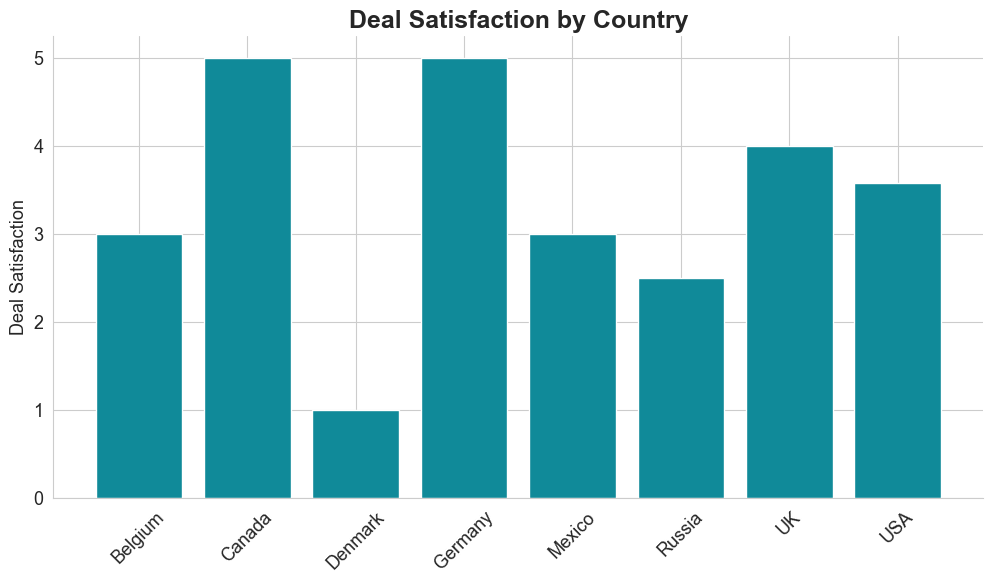

In [119]:
sns.set_style("whitegrid") # override the default matplotlib style, to avoid the grey background, but keep the grid

plt.figure(figsize = (12, 6)) # determine the size of the chart

plt.bar(x = averages_by_country.index, # specify the x axis
        height = averages_by_country['deal_satisfaction'], # specify the y axis
        color = "#108A99") # the colour for the bars

# format the ticks
plt.xticks(rotation = 45, fontsize = 13) # rotate and format the labels for the x-axis
plt.yticks(fontsize = 13) # format the y-axis
plt.title("Deal Satisfaction by Country", fontsize = 18, fontweight = "bold") #add and format the title for the chart
plt.ylabel("Deal Satisfaction", fontsize = 13 ) #add a title for the y-axis

sns.despine() # removes the top and right border of our graph

plt.savefig("deal_satisfaction_by_country_bar_chart.png") # you can export your chart as a picture

plt.show()

# Age Distribution Histogram

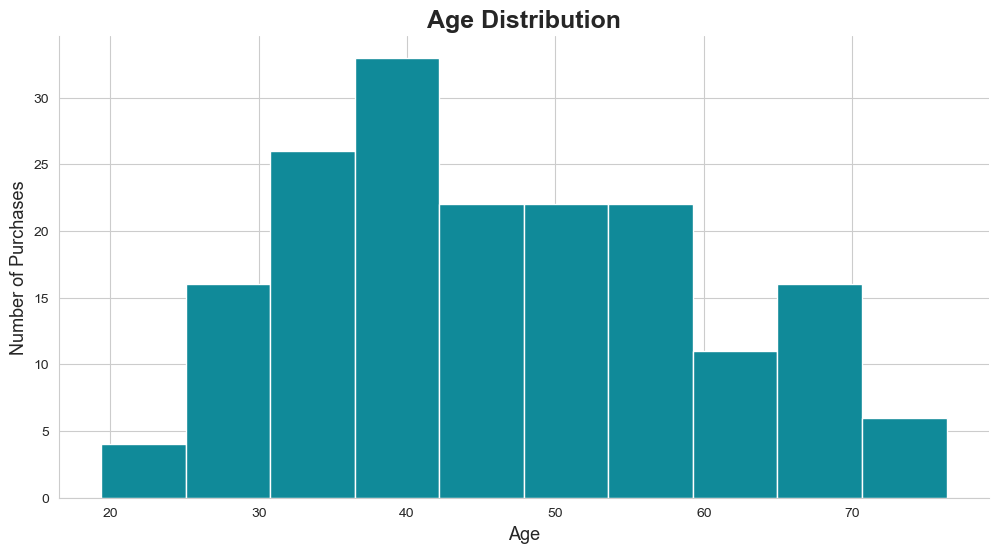

In [120]:
sns.set_style("whitegrid") # override the default matplotlib style, to avoid the grey background, but keep the grid

plt.figure(figsize = (12, 6)) # determine the size of the figure

plt.hist(data['age_at_purchase'], # the variable on which to create the histogram
         bins = 10, # create a histogram with 10 bins
         color = "#108A99")

plt.title("Age Distribution", fontsize = 18, weight = "bold")
plt.xlabel("Age", fontsize=13)
plt.ylabel("Number of Purchases", fontsize=13)

sns.despine() # removes the top and right border of our graph

plt.savefig("age_distribution_histogram.png") # export chart as a picture

plt.show()

# Segmentation by State (Pareto Chart)

This is a Pareto diagram. The bars show the absolute frequency of each category. In this case this translates to: how many customers are there from each state. For example, there are 4 customers from Virginia.

The secondary axis (the orange line), shows the cumulative frequency. For example, California, Nevada, and Oregon together, account for 82% of all purchases.

In [121]:
# The frequency data required for a Pareto Chart has been previously calculated

sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
california,118,0.666667,0.666667
nevada,17,0.096045,0.762712
colorado,11,0.062147,0.824859
oregon,11,0.062147,0.887006
arizona,9,0.050847,0.937853
utah,5,0.028249,0.966102
virginia,4,0.022599,0.988701
kansas,1,0.005650,0.994350
wyoming,1,0.005650,1.000000


In [122]:
# Import the relevant library to plot the percentages on the second y axis

from matplotlib.ticker import PercentFormatter

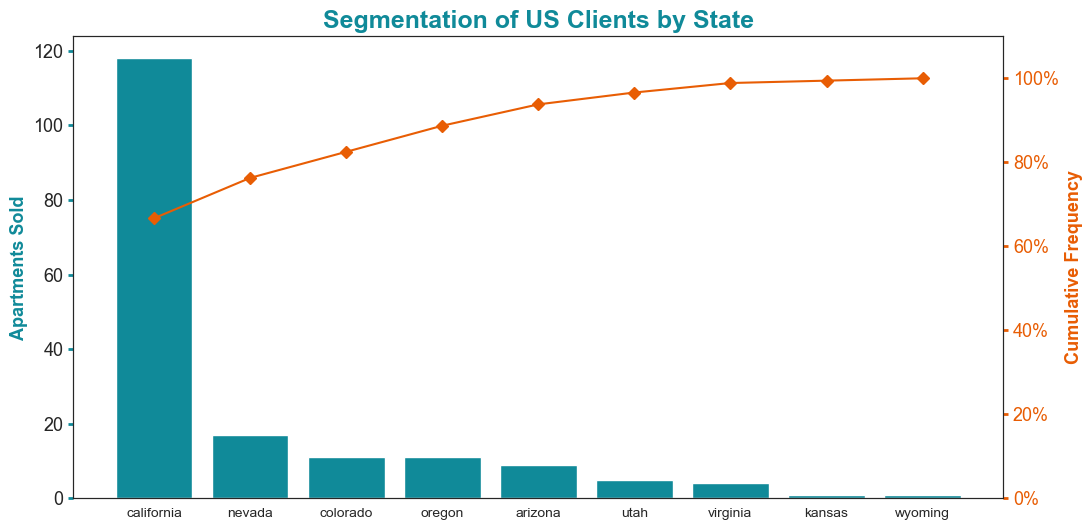

In [123]:
# Setting the seaborn style to "white" for aesthetic reasons - to override the default matplotlib style, 
# removing the grey background and grid for a cleaner look.

sns.set_style("white") 

# To create the Pareto diagram, we first initiate a figure with two axes.
fig, ax = plt.subplots(figsize = (12, 6))

# The first part of our visualization is a bar chart, featuring the 'sold_by_state' index on the x-axis 
# and the frequency on the y-axis.
ax.bar(sold_by_state.index,
       sold_by_state['frequency'],
       color = "#108A99")

# Setting a descriptive y-axis label.
ax.set_ylabel("Apartments Sold", 
              weight='bold',
              fontsize = 13,
              color = "#108A99")

# Formatting the y-axis ticks.
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 13,
               color = "#108A99")

# Creating a second axis that shares the same x-axis as the first.
ax2 = ax.twinx()

# Setting the y-axis limit and formatting it to show percentages.
ax2.set_ylim(0, 1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

# The second part of our visualization is a line chart sharing the x-axis with the bar chart, 
# and featuring the cumulative frequency on the y-axis.
ax2.plot(sold_by_state.index,
         sold_by_state["cumulative_frequency"], 
         color = "#E85D04", 
         marker = "D")

# Setting a descriptive y-axis label.
ax2.set_ylabel("Cumulative Frequency", 
               color = "#E85D04", 
               weight = "bold",
               fontsize=13)

# Formatting the y-axis ticks.
ax2.tick_params(axis = "y", 
                colors = "#E85D04", 
                width = 2, 
                labelsize = 13)

# Adding a title to the visualization.
ax.set_title("Segmentation of US Clients by State", fontsize = 18, weight = "bold", color = "#108A99")

# Saving the visualization as an image file.
plt.savefig("US_segmentation_by_state_pareto_diagram.png") 

# Displaying the final visualization.
plt.show()

# Total Sales per Year Line chart

In [124]:
data.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,california,Home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.0, 285847.0]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,california,Home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.0, 285847.0]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,california,Home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201706.0, 243776.0]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,california,Investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.0, 454130.0]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,california,Home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.0, 496201.0]"


In [125]:
# Create a column in the data set that has just the year of purchase

data['year_sale'] = data['date_sale'].apply(lambda x: x.year)
data['year_sale']

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

In [126]:
# Repalce missing values as 0 to be able to call function '.astype()' and convert year from a float to an int

data['year_sale'] = data['year_sale'].fillna(0).astype(int)

In [127]:
data['year_sale']

0      2005
1      2005
2      2007
3      2007
4      2004
       ... 
262       0
263       0
264       0
265       0
266       0
Name: year_sale, Length: 267, dtype: int32

In [128]:
# Convert all 0's back to NA

# data['year_sale'] = data['year_sale'].replace({0:pd.NA})

In [131]:
# Formulate the desired breakdown by year

columns_of_interest = ['year_sale', 'price$']
revenue_per_year = data[columns_of_interest].groupby('year_sale').sum()

# For clarity rename price$ to revenue 

revenue_per_year = revenue_per_year.rename(columns={'price$':'revenue$'})
revenue_per_year

,revenue$
year_sale,
0,22533158.29
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


In [132]:
# Make a simpler to read revenue value by converting it into millions

revenue_per_year['revenue$inM'] = revenue_per_year['revenue$'] / 1000000

In [134]:
# To improve our data representation, we'll add a new data point for the year 2009.
# This year will display 0 revenue, reflecting the actual situation.
# This inclusion aids in presenting a more accurate reality.
revenue_per_year_adj = revenue_per_year.copy() 
# Adding a new row for the year 2009 with 0 revenue.
revenue_per_year_adj = revenue_per_year_adj.append({'revenue$': 0, 
                                                    'revenue$inM': 0},
                                                    ignore_index=True)
# Adjusting the index to include 2009.
revenue_per_year_adj.index = ['0','2004','2005','2006','2007','2008','2010','2009']
# Reordering the dataframe to chronologically arrange the years.
revenue_per_year_adj = revenue_per_year_adj.loc[['0','2004','2005','2006','2007','2008','2009','2010']]
revenue_per_year_adj

C:\Users\User\AppData\Local\Temp\ipykernel_14076\3974548581.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  revenue_per_year_adj = revenue_per_year_adj.append({'revenue$': 0,


,revenue$,revenue$inM
0,22533158.29,22.533158
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2009,0.00,0.000000
2010,357538.20,0.357538


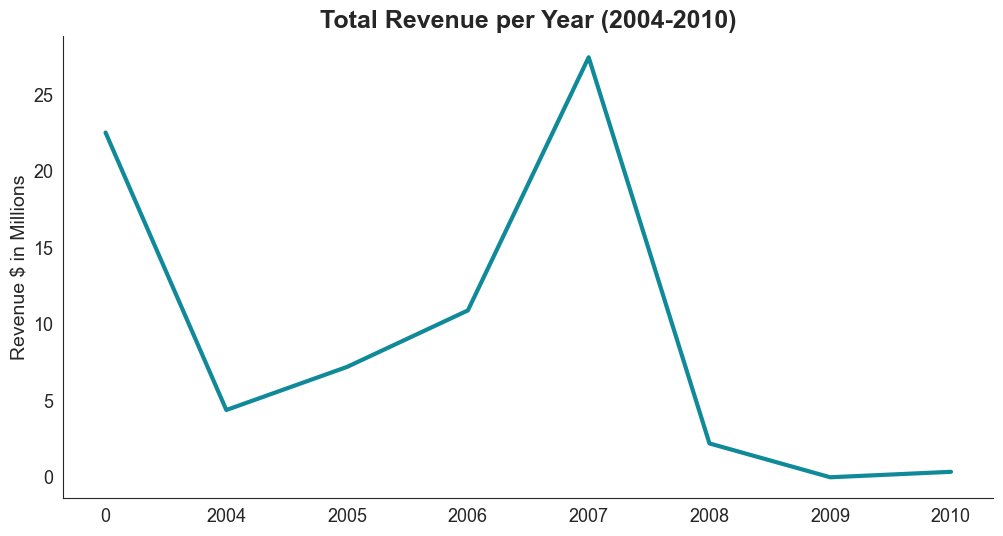

In [135]:
#sns.set_style("whitegrid") # Apply a whitegrid style to override the default matplotlib style, keeping the grid for clarity.

plt.figure(figsize = (12, 6)) # Initiate a figure of appropriate size to match our other figures.

# Construct a line chart using the adjusted data.
plt.plot(revenue_per_year_adj['revenue$inM'], 
         color='#108A99', 
         linewidth=3)

# Add formatting elements to the chart: a title, labels and a legend.
plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue $ in Millions", fontsize = 14)
plt.xticks(fontsize = 13) # Format the labels for the x-axis.
plt.yticks(fontsize = 13) # Format the y-axis labels.

sns.despine() # Remove the top and right border of the chart for a cleaner look.

plt.savefig("total_revenue_per_year_in_M_line_chart.png") # Export the chart as an image file.

plt.show() # Display the chart.

# Total Sales by Year and Building Stacked Area Chart

In [136]:
# Create a copy of the data set to preprocess it for the stacked area chart

data_stacked_area = data.copy()

In [137]:
# Our goal is to find the number of sales per year for each building.
# This requires a table with both time and building data.
# However, the information on the building is contained in one single variable, 'building'.
# We need to split this into separate entities, resulting in five dummy variables.
building_dummies = pd.get_dummies(data_stacked_area['building'])
building_dummies.head()

,1,2,3,4,5
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,1,0,0,0,0


In [138]:
# Now, let's incorporate these dummy variables into our main dataframe.
data_stacked_area = pd.concat([data_stacked_area, building_dummies], axis=1)
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.0, 285847.0]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.0, 285847.0]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201706.0, 243776.0]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.0, 454130.0]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.0, 496201.0]",2004,1,0,0,0,0


In [139]:
# next, we can rename them accordingly
data_stacked_area = data_stacked_area.rename(columns={'1':'building1',
                                                    '2':'building2',
                                                    '3':'building3',
                                                    '4':'building4',
                                                    '5':'building5'})
data_stacked_area.head()

,id,building,date_sale,type,property#,area,sold,customerid,price$,individual,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,building1,building2,building3,building4,building5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,1.0,...,19.378082,19.0,"(19.0, 25.0]","(243776.0, 285847.0]",2005,1,0,0,0,0
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,1.0,...,22.616438,22.0,"(19.0, 25.0]","(243776.0, 285847.0]",2005,1,0,0,0,0
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,1.0,...,21.523288,21.0,"(19.0, 25.0]","(201706.0, 243776.0]",2007,0,1,0,0,0
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,1.0,...,21.942466,21.0,"(19.0, 25.0]","(412059.0, 454130.0]",2007,0,1,0,0,0
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,1.0,...,25.484932,25.0,"(25.0, 31.0]","(454130.0, 496201.0]",2004,1,0,0,0,0


In [140]:
# Filter out only the sold apartments, as they are the only ones of interest.
data_stacked_area = data_stacked_area[data_stacked_area['sold'] == 1]

In [141]:
# to make the breakdown by year and by bulding
# we include the 'year_sale' variable and all the bulding dummies
columns_of_interest = ['year_sale','building1','building2','building3','building4','building5']
stacked_area = data_stacked_area[columns_of_interest].groupby('year_sale').sum()
stacked_area

# the result is the data per year and per building

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


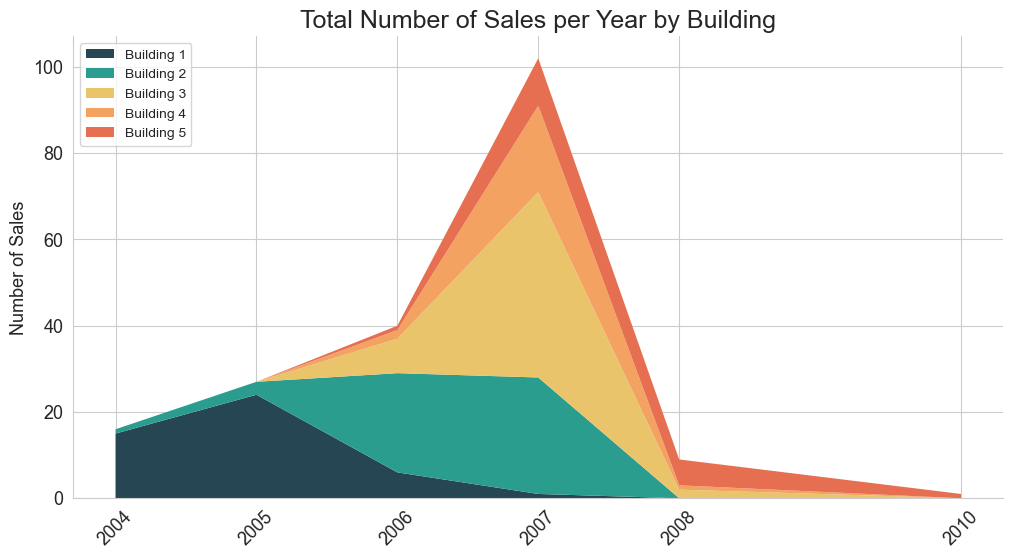

In [143]:
# let's choose different colors for each of the buldings
# We'll assign unique colors for each of the buildings to differentiate them on the plot.
colors = ["#264653", "#2A9D8F", "#E9C46A",'#F4A261','#E76F51']

# List of labels for the legend.
# These should appear in the same order as the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]

# Utilize seaborn's 'whitegrid' theme for a cleaner look with a white background.
sns.set_style("whitegrid")

# Initiate a figure that's in line with the dimensions of the other figures.
plt.figure(figsize = (12, 6))

# Create a stacked area plot with our data.
plt.stackplot(stacked_area.index, # The x-axis is simply the index (the year).
              stacked_area['building1'],
              stacked_area['building2'],
              stacked_area['building3'],
              stacked_area['building4'],
              stacked_area['building5'],
              colors = colors,
              edgecolor = 'none')

# Include x-axis labels for each year and rotate them by 45 degrees for better readability.
plt.xticks(stacked_area.index, rotation = 45) 

# Add a legend and specify its location on the chart.
plt.legend(labels = labels, loc = "upper left") 

# Label the y-axis and format the x and y tick marks for improved readability.
plt.ylabel("Number of Sales", fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# Provide a clear title for the chart.
plt.title("Total Number of Sales per Year by Building", fontsize = 18)

# Remove top and right borders of the chart for a cleaner look.
sns.despine()

# Save your chart as an image for external use.
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.png")

# Display the plot.
plt.show() 